## ライブラリ読み込み

In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from bs4 import BeautifulSoup
import requests
from time import sleep

In [5]:
# サッカー試合結果まとめサイト
# 2012-2018までデータが存在
# url = 'http://www.football-lab.jp/ka-f/match/?year=2017'
# url = 'http://www.football-lab.jp/ka-f/match/'

## データ読み込み

In [6]:
# チーム名読み込み
df_tm = pd.read_csv('team.csv',sep=',', encoding="utf_8")
tm_list = df_tm.iloc[:,0]
tm_url_list = df_tm.iloc[:,3]

In [127]:
# 空のDataFrameを作成
url = 'http://soccer.from.tv/team/276/y17/'
data = pd.io.html.read_html(url)[3]
df_raw = DataFrame(data)
df = pd.DataFrame(columns = df_raw.iloc[0,0:])
df['tm']=''


# 対戦結果データのスクレイピング
for obs_tm in tm_url_list: 
    for i_year in range(7):
#     for i_year in range(1):
        
        # 対戦情報を取得
        print(obs_tm)
        year = i_year+12
        url = 'http://soccer.from.tv/team/{}/y{}/'.format(obs_tm, year)
        print(url)

        # データの存在しないページは除外
        if len(pd.io.html.read_html(url)) == 8 :        
            data = pd.io.html.read_html(url)[3]
            df_raw = DataFrame(data)
            df2=df_raw.iloc[1:,0:]
            df2.columns = df_raw.iloc[0,0:]

            # 自チーム名を取得
            result = requests.get(url)
            c = result.content
            soup = BeautifulSoup(c, "html.parser")
            tm = soup.find("div", attrs={"class": "page_title"}).b.string
            df2['tm']=tm

            df = df.append(df2)
        
        #エラー対策に0.5秒時間を置く
        sleep(0.5)

276
http://soccer.from.tv/team/276/y12/
276
http://soccer.from.tv/team/276/y13/
276
http://soccer.from.tv/team/276/y14/
276
http://soccer.from.tv/team/276/y15/
276
http://soccer.from.tv/team/276/y16/
276
http://soccer.from.tv/team/276/y17/
276
http://soccer.from.tv/team/276/y18/
294
http://soccer.from.tv/team/294/y12/
294
http://soccer.from.tv/team/294/y13/
294
http://soccer.from.tv/team/294/y14/
294
http://soccer.from.tv/team/294/y15/
294
http://soccer.from.tv/team/294/y16/
294
http://soccer.from.tv/team/294/y17/
294
http://soccer.from.tv/team/294/y18/
176
http://soccer.from.tv/team/176/y12/
176
http://soccer.from.tv/team/176/y13/
176
http://soccer.from.tv/team/176/y14/
176
http://soccer.from.tv/team/176/y15/
176
http://soccer.from.tv/team/176/y16/
176
http://soccer.from.tv/team/176/y17/
176
http://soccer.from.tv/team/176/y18/
103
http://soccer.from.tv/team/103/y12/
103
http://soccer.from.tv/team/103/y13/
103
http://soccer.from.tv/team/103/y14/
103
http://soccer.from.tv/team/103/y15/


150
http://soccer.from.tv/team/150/y14/
150
http://soccer.from.tv/team/150/y15/
150
http://soccer.from.tv/team/150/y16/
150
http://soccer.from.tv/team/150/y17/
150
http://soccer.from.tv/team/150/y18/
193
http://soccer.from.tv/team/193/y12/
193
http://soccer.from.tv/team/193/y13/
193
http://soccer.from.tv/team/193/y14/
193
http://soccer.from.tv/team/193/y15/
193
http://soccer.from.tv/team/193/y16/
193
http://soccer.from.tv/team/193/y17/
193
http://soccer.from.tv/team/193/y18/
131
http://soccer.from.tv/team/131/y12/
131
http://soccer.from.tv/team/131/y13/
131
http://soccer.from.tv/team/131/y14/
131
http://soccer.from.tv/team/131/y15/
131
http://soccer.from.tv/team/131/y16/
131
http://soccer.from.tv/team/131/y17/
131
http://soccer.from.tv/team/131/y18/
128
http://soccer.from.tv/team/128/y12/
128
http://soccer.from.tv/team/128/y13/
128
http://soccer.from.tv/team/128/y14/
128
http://soccer.from.tv/team/128/y15/
128
http://soccer.from.tv/team/128/y16/
128
http://soccer.from.tv/team/128/y17/


In [128]:
# backup
df_bk = df

In [129]:
# カラムの抽出
df = df[[
    '年月日', 
    '試合',
    '節/回戦',
    'H/A',
    'スコア',
    '相手',
    'SH',
    '被SH',
    '天候',
    '試合会場',
    'J公式',
    'tm'
]]

# 年月日がnullのデータを除外
df=df[df["年月日"].notnull()]

In [130]:
# 試合結果フラグを作成
df.loc[df['スコア'].str.contains('○'),'match_result'] = 'W'
df.loc[df['スコア'].str.contains('●'),'match_result'] = 'L'
df.loc[df['スコア'].str.contains('△'),'match_result'] = 'D'

# 勝敗文字を除外
df['スコア'] = df['スコア'].str.replace("○","")
df['スコア'] = df['スコア'].str.replace("●","")
df['スコア'] = df['スコア'].str.replace("△","")

# PKは引き分け扱い
df.loc[df['スコア'].str.contains('PK'),'match_result'] = 'D'
df['スコア'] = df['スコア'].str.split('PK').str[0]

# 得点を抽出
df['goals_for'] = df['スコア'].str.split(' - ').str[0]
df['goals_against'] = df['スコア'].str.split(' - ').str[1]

# 型変換
df['goals_for'] = df['goals_for'].astype(np.int64)
df['goals_against'] = df['goals_against'].astype(np.int64)

# 得失点差を計算
df['goals_difference'] = df['goals_for'] - df['goals_against']

In [131]:
# カラム名を英名に変更
df = df.rename(columns={
    '年月日':'dte', 
    '相手':'tm_opp',
    '節/回戦':'match_round',
    'H/A':'stadium_HA',
    'SH':'sh_for',
    '被SH':'sh_against',
    '試合':'match_type',
    '天候':'weather',
    '試合会場':'stadium'
})

# カラムの整理
df = df.loc[:,[
    'tm'
    ,'tm_opp'
    ,'match_type'
    ,'match_round'
    ,'stadium'
    ,'stadium_HA'
    ,'dte'
    ,'match_result'
    ,'goals_difference'
    ,'goals_for'
    ,'goals_against'
    ,'weather'
#     ,'goals_player'
    ,'sh_for'
    ,'sh_against'
]]

# インデックスのリセット
df.reset_index(drop=True, inplace=True)

In [132]:
# csvに吐き出し
df.to_csv('df_res.csv')

PermissionError: [Errno 13] Permission denied: 'df_res.csv'

In [122]:
df

0      tm tm_opp match_type match_round stadium stadium_HA         dte  \
0      札幌     新潟         J1        第34節    東北電ス          A  2012/12/01   
1      札幌   横浜FM         J1        第33節     札幌ド          H  2012/11/24   
2      札幌     鳥栖         J1        第32節     札幌ド          H  2012/11/17   
3      札幌     広島         J1        第31節     広島ビ          A  2012/11/07   
4      札幌   FC東京         J1        第30節     味スタ          A  2012/10/27   
5      札幌     鹿島         J1        第29節    札幌厚別          H  2012/10/20   
6      札幌     浦和         J1        第28節      埼玉          A  2012/10/06   
7      札幌    川崎F         J1        第27節     等々力          A  2012/09/29   
8      札幌     大宮         J1        第26節    札幌厚別          H  2012/09/22   
9      札幌      柏         J1        第25節       柏          A  2012/09/15   
10     札幌     長野        天皇杯         2回戦    札幌厚別          H  2012/09/08   
11     札幌     清水         J1        第24節     札幌ド          H  2012/09/01   
12     札幌    G大阪         J1        第23節      万博          A  2012/08/25   
13     札幌     神戸         J1        第22節    札幌厚別          H  2012/08/18   
14     札幌     仙台         J1        第21節     札幌ド          H  2012/08/11   
15     札幌    C大阪         J1        第20節    金鳥スタ          A  2012/08/04   
16     札幌    名古屋         J1        第19節    札幌厚別          H  2012/07/28   
17     札幌     磐田         J1        第18節     ヤマハ          A  2012/07/14   
18     札幌     新潟         J1        第17節    札幌厚別          H  2012/07/07   
19     札幌     鳥栖         J1        第16節    ベアスタ          A  2012/06/30   
20     札幌    G大阪         J1        第15節     札幌ド          H  2012/06/23   
21     札幌     仙台         J1        第14節    ユアスタ          A  2012/06/16   
22     札幌     神戸        ナビ杯       予選(6)    ホームズ          A  2012/06/09   
23     札幌     清水        ナビ杯       予選(5)    札幌厚別          H  2012/06/06   
24     札幌     広島         J1        第13節    札幌厚別          H  2012/05/26   
25     札幌     鹿島         J1        第12節     カシマ          A  2012/05/19   
26     札幌     大宮        ナビ杯       予選(4)    NACK          A  2012/05/16   
27     札幌   FC東京         J1        第11節     札幌ド          H  2012/05/12   
28     札幌   横浜FM         J1        第10節     日産ス          A  2012/05/06   
29     札幌    C大阪         J1         第9節    札幌厚別          H  2012/05/03   
...   ...    ...        ...         ...     ...        ...         ...   
2023  名古屋     清水         J1        第21節    アウスタ          A  2012/08/11   
2024  名古屋     清水        ナビ杯     準々決勝(2)     瑞穂陸          H  2012/08/08   
2025  名古屋     神戸         J1        第20節     瑞穂陸          H  2012/08/04   
2026  名古屋     札幌         J1        第19節    札幌厚別          A  2012/07/28   
2027  名古屋     清水        ナビ杯     準々決勝(1)    アウスタ          A  2012/07/25   
2028  名古屋     仙台         J1        第18節     豊田ス          H  2012/07/14   
2029  名古屋      柏         J1        第17節      国立          A  2012/07/07   
2030  名古屋   横浜FM         J1        第16節     日産ス          A  2012/06/30   
2031  名古屋    G大阪         J1         第9節      万博          A  2012/06/27   
2032  名古屋     磐田         J1        第15節     瑞穂陸          H  2012/06/23   
2033  名古屋     鹿島         J1        第14節     カシマ          A  2012/06/16   
2034  名古屋  アデレード        ACL      ラウンド16      豪州          A  2012/05/29   
2035  名古屋    C大阪         J1        第13節     豊田ス          H  2012/05/25   
2036  名古屋     仙台         J1        第12節    ユアスタ          A  2012/05/19   
2037  名古屋  Cコースト        ACL       予選(6)     瑞穂陸          H  2012/05/15   
2038  名古屋     神戸         J1        第11節    ホームズ          A  2012/05/12   
2039  名古屋    川崎F         J1        第10節     豊田ス          H  2012/05/06   
2040  名古屋     城南        ACL       予選(5)      韓国          A  2012/05/01   
2041  名古屋     浦和         J1         第8節     瑞穂陸          H  2012/04/28   
2042  名古屋     広島         J1         第7節     広島ビ          A  2012/04/21   
2043  名古屋   天津泰達        ACL       予選(4)     瑞穂陸          H  2012/04/18   
2044  名古屋     札幌         J1         第6節     豊田ス          H  2012/04/14   
2045

## データ読み込み（csv）

In [123]:
df = pd.read_csv('df_res.csv',sep=',', encoding="SHIFT-JIS")

## モデル構築

In [124]:
df_sapp = df[df['tm']=='札幌']

In [125]:
df_sapp

Unnamed: 0  tm tm_opp match_type match_round stadium stadium_HA  \
0            0  札幌     新潟         J1        第34節    東北電ス          A   
1            1  札幌   横浜FM         J1        第33節     札幌ド          H   
2            2  札幌     鳥栖         J1        第32節     札幌ド          H   
3            3  札幌     広島         J1        第31節     広島ビ          A   
4            4  札幌   FC東京         J1        第30節     味スタ          A   
5            5  札幌     鹿島         J1        第29節    札幌厚別          H   
6            6  札幌     浦和         J1        第28節      埼玉          A   
7            7  札幌    川崎F         J1        第27節     等々力          A   
8            8  札幌     大宮         J1        第26節    札幌厚別          H   
9            9  札幌      柏         J1        第25節       柏          A   
10          10  札幌     長野        天皇杯         2回戦    札幌厚別          H   
11          11  札幌     清水         J1        第24節     札幌ド          H   
12          12  札幌    G大阪         J1        第23節      万博          A   
13          13  札幌     神戸         J1        第22節    札幌厚別          H   
14          14  札幌     仙台         J1        第21節     札幌ド          H   
15          15  札幌    C大阪         J1        第20節    金鳥スタ          A   
16          16  札幌    名古屋         J1        第19節    札幌厚別          H   
17          17  札幌     磐田         J1        第18節     ヤマハ          A   
18          18  札幌     新潟         J1        第17節    札幌厚別          H   
19          19  札幌     鳥栖         J1        第16節    ベアスタ          A   
20          20  札幌    G大阪         J1        第15節     札幌ド          H   
21          21  札幌     仙台         J1        第14節    ユアスタ          A   
22          22  札幌     神戸        ナビ杯       予選(6)    ホームズ          A   
23          23  札幌     清水        ナビ杯       予選(5)    札幌厚別          H   
24          24  札幌     広島         J1        第13節    札幌厚別          H   
25          25  札幌     鹿島         J1        第12節     カシマ          A   
26          26  札幌     大宮        ナビ杯       予選(4)    NACK          A   
27          27  札幌   FC東京         J1        第11節     札幌ド          H   
28          28  札幌   横浜FM         J1        第10節     日産ス          A   
29          29  札幌    C大阪         J1         第9節    札幌厚別          H   
30          30  札幌     大宮         J1         第8節    NACK          A   
31          31  札幌    川崎F         J1         第7節     札幌ド          H   
32          32  札幌     鹿島        ナビ杯       予選(3)     札幌ド          H   
33          33  札幌    名古屋         J1         第6節     豊田ス          A   
34          34  札幌      柏         J1         第5節     札幌ド          H   
35          35  札幌   横浜FM        ナビ杯       予選(2)    ニッパツ          A   
36          36  札幌     清水         J1         第4節    アウスタ          A   
37          37  札幌     浦和         J1         第3節     札幌ド          H   
38          38  札幌     新潟        ナビ杯       予選(1)     札幌ド          H   
39          39  札幌     神戸         J1         第2節    ホームズ          A   
40          40  札幌     磐田         J1         第1節     札幌ド          H   

           dte match_result  goals_difference  goals_for  goals_against  \
0   2012/12/01            L                -3          1              4   
1   2012/11/24            L                -2          0              2   
2   2012/11/17            L                -1          2              3   
3   2012/11/07            L                -3          0              3   
4   2012/10/27            L                -5          0              5   
5   2012/10/20            D                 0          0              0   
6   2012/10/06            W                 1          2              1   
7   2012/09/29            L                -1          0              1   
8   2012/09/22            L                -5          0              5   
9   2012/09/15            L                -2          1              3   
10  2012/09/08            D                 0          1              1   
11  2012/09/01            L                -2          0              2   
12  2012/08/25            L                -5 

C:\Users\koki.takinai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


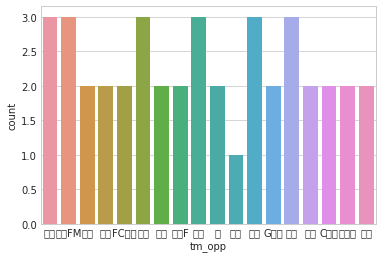

In [126]:
sns.countplot(x='tm_opp',data=df_sapp)

In [8]:
plt.rcParams['font.family'] = 'IPAGothic'

In [15]:
import matplotlib as mpl
print(mpl.matplotlib_fname())

C:\Users\koki.takinai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
